# Historisk gang- sykkelvegnett

Utforsker metoder for å hente historisk G/S fra 2014 - dd

Faller evt tilbake på å hente 532-objekter fra TNE? 

In [2]:
import pandas as pd
import geopandas as gpd
from shapely import wkt 

import STARTHER
import nvdbapiv3
import nvdbgeotricks 

Legger NVDB api til søkestien


# Henter historisk vegnett for trafikantgruppe G

In [3]:
v = nvdbapiv3.nvdbVegnett()
v.filter( {'trafikantgruppe' : 'G', 'historisk' : True })
vegnett = pd.DataFrame( v.to_records())

In [ ]:
# Fyller inn dummy dato på dem som har åpen sluttdato
vegnett['sluttdato'].fillna( '2050-12-31', inplace=True  )

In [2]:
vegnett['sluttdato'] = pd.to_datetime( vegnett['sluttdato'] )
vegnett['startdato'] = pd.to_datetime( vegnett['startdato'])

vegnett['geometry'] = vegnett['geometri'].apply( wkt.loads )
vegnett = gpd.GeoDataFrame( vegnett, geometry='geometry', crs=5973)
vegnett.drop( columns='geometri', inplace=True )


NameError: name 'vegnett' is not defined

# Henter ALT historisk vegnett, plukker ut G/S derfra

Blir cirka 10 millioner objekt, tar om lag 3-4 timer å hente. 

In [26]:
v = nvdbapiv3.nvdbVegnett()
v.filter( { 'historisk' : True })
vegnett = pd.DataFrame( v.to_records())

In [28]:
# Fyller inn dummy dato på dem som har åpen sluttdato
vegnett['sluttdato'].fillna( '2050-12-31', inplace=True  )

In [29]:
vegnett['sluttdato'] = pd.to_datetime( vegnett['sluttdato'] )
vegnett['startdato'] = pd.to_datetime( vegnett['startdato'])


In [30]:
# nyeste = vegnett[ vegnett['sluttdato'] > '2013-12-31']

In [31]:
# nyeste['trafikantgruppe'].value_counts( dropna=False)

NaN    4575066
K      3481646
G       445757
Name: trafikantgruppe, dtype: int64

In [27]:
# vegnett['trafikantgruppe'].value_counts( dropna=False )

NaN    6131813
K      3481646
G       445757
Name: trafikantgruppe, dtype: int64

In [138]:
# vegnett['detaljnivå'].value_counts( dropna=False)

Vegtrase og kjørebane    8901304
Kjørebane                 714732
Vegtrase                  381409
Kjørefelt                  61771
Name: detaljnivå, dtype: int64

In [4]:
# vegnett['type'].value_counts( dropna=False)

In [146]:
# vn2 = vegnett[ vegnett['type'] == 'HOVED'].copy()
# vn2['trafikantgruppe'].value_counts( dropna=False)

NaN    5510470
K      3056198
G       321244
Name: trafikantgruppe, dtype: int64

In [142]:
# vn3 = vn2[ vn2['sluttdato'] > '2009-12-31']
# vn3['trafikantgruppe'].value_counts( dropna=False )

NaN    4824620
K      3056198
G       321244
Name: trafikantgruppe, dtype: int64

Vi har veldig mangelfulle data på trafikantgruppe for gammalt vegnett, ergo er jeg skeptisk  denne analysen ubrukelig for oss. Viderefører analysen for å kunne sammenligne med 532-objekt. 

In [151]:
# vn2.columns

Index(['href', 'veglenkesekvensid', 'startposisjon', 'sluttposisjon',
       'kortform', 'veglenkenummer', 'segmentnummer', 'startnode', 'sluttnode',
       'referanse', 'type', 'detaljnivå', 'typeVeg', 'typeVeg_sosi',
       'målemetode', 'feltoversikt', 'geometri', 'lengde', 'fylke', 'kommune',
       'vegsystemreferanse', 'startdato', 'sluttdato', 'vref', 'vegkategori',
       'fase', 'nummer', 'gate', 'strekning', 'delstrekning', 'fra_meter',
       'til_meter', 'trafikantgruppe', 'adskilte_lop', 'medium', 'måledato',
       'ankerpunktmeter', 'sideanleggsdel', 'kryssdel', 'topologinivå',
       'superstedfesting', 'geometry'],
      dtype='object')

In [152]:
vn2['geometry'] = vn2['geometri'].apply( wkt.loads )
vn2 = gpd.GeoDataFrame( vn2, geometry='geometry', crs=5973  )
vn2.drop( columns=['geometri', 'href','veglenkenummer', 'segmentnummer', 'startnode', 'sluttnode', 
                  'referanse', 'typeVeg_sosi', 'vegsystemreferanse', 'gate' ], inplace=True )

In [5]:
lengder2 = [ ]
for year in range( 2012, 2022): 
    
    sub = vn2[ (vn2['startdato'] <= str(year)+'-12-31') & (vn2['sluttdato'] > str(year)+'-12-31' ) ]
    sub.to_file( 'historiskGS_fravegnett.gpkg', layer='gsvegnett'+str(year)+'-12-31', driver='GPKG')
    print( f"{year} : {len(sub)} vegsegmenter" )
    rapport = sub.groupby( ['Vegkategori']).agg( {'strekningslengde' : 'sum'}).reset_index()
    data = { 'År' : year }
    for ix, row in rapport.iterrows():
        data[row['Vegkategori']] = row['strekningslengde'] / 1000
    
    lengder2.append( data )

#  Henter historisk 532-objekt

In [11]:
sok = nvdbapiv3.nvdbFagdata( 532)
# Vegstatus = G (Gang/sykkelveg) eller U (Midlertidig status gang-/sykkelveg)
# sok.filter( {'alle_versjoner' : True, 'egenskap' : '(4567=12983 OR 4567=12159)' })
sok.filter( { 'egenskap' : '(4567=12983 OR 4567=12159)', 'tidspunkt' : '2022-12-31'})


In [12]:
vegref = pd.DataFrame( sok.to_records( vegsegmenter=True ) )

Eksport av 111055 objekter kommer til å ta tid...
Objekt 1000 av 111055
Objekt 5000 av 111055
Objekt 10000 av 111055
Objekt 20000 av 111055
Objekt 30000 av 111055
Objekt 40000 av 111055
Objekt 50000 av 111055
Objekt 60000 av 111055
Objekt 70000 av 111055
Objekt 80000 av 111055
Objekt 90000 av 111055
Objekt 100000 av 111055
Objekt 110000 av 111055


In [21]:
vegref.iloc[0]

objekttype                                                           532
nvdbId                                                             70569
versjon                                                                1
startdato                                                     1950-01-01
Brkode1                                               Start hovedparsell
Brkode2                                              Slutt veg/delstrekn
Envegsregulering                                                        
Fylkesnummer                                                           9
Kommunenummer                                                         38
Vegkategori                                                   Privat veg
Vegstatus                                                Gang-/sykkelveg
Vegnummer                                                          99848
Hovedparsell                                                           1
VegstatusOver                                      

In [23]:
vegref.iloc[0]['geometry'].length

73.15471155293426

In [22]:
vegref.iloc[0]['vegsegmenter']

[{'veglenkesekvensid': 17980,
  'startposisjon': 0.0,
  'sluttposisjon': 1.0,
  'lengde': 73.196,
  'retning': 'MED',
  'veglenkeType': 'HOVED',
  'detaljnivå': 'Vegtrase og kjørebane',
  'typeVeg': 'Gang- og sykkelveg',
  'typeVeg_sosi': 'gangOgSykkelveg',
  'startdato': '2020-12-10',
  'geometri': {'wkt': 'LINESTRING Z(84781.6 6542965.6 224.024, 84772 6542944.9 224.224, 84759.6 6542920.2 225.424, 84748.5 6542900.4 226.224)',
   'srid': 5973},
  'kommune': 4220,
  'fylke': 42,
  'vegsystemreferanse': {'vegsystem': {'id': 1012071814,
    'versjon': 1,
    'vegkategori': 'P',
    'fase': 'V',
    'nummer': 99848},
   'strekning': {'id': -1,
    'versjon': -1,
    'strekning': 1,
    'delstrekning': 1,
    'arm': False,
    'adskilte_løp': 'Nei',
    'trafikantgruppe': 'G',
    'fra_meter': 0.0,
    'til_meter': 73.196,
    'retning': 'MED'},
   'kortform': 'PV99848 S1D1 m0-73'}}]

In [39]:
vegref['sluttdato'].fillna( '2050-12-31', inplace=True )
vegref['startdato'] = pd.to_datetime( vegref['startdato'] )
vegref['sluttdato'] = pd.to_datetime( vegref['sluttdato'] )

In [19]:
vegref['geometry'] = vegref['geometri'].apply( wkt.loads )

In [65]:
vegref.drop( columns='vegsegmenter', inplace=True)

In [20]:
vegref = gpd.GeoDataFrame( vegref, geometry='geometry', crs=5973 )

# Filtrerer vekk konnekteringslenker og fiktiv veg

In [82]:
print( f"{len( vegref)} objekter med lengde {vegref['strekningslengde'].sum()}")

220589 objekter med lengde 24222460.509999998


In [84]:
vegref = vegref[ vegref['Vegtype'] != 'Fiktiv']
vegref = vegref[ vegref['Konnekteringslenke'] != 'Konnekteringslenke' ]

In [85]:
print( f"{len( vegref)} objekter med lengde {vegref['strekningslengde'].sum()}")

167869 objekter med lengde 23368596.019


# Oh, lord, don't go there!

Vi hopper over bekymringen over at geometrilengden avviker på veldig ... interessante måter, og slår oss til ro med at det meste av dataene ser ut til å ha god integritet (geometrilengden sånn cirka like stor som strekningslengde-egenskapen). 

In [13]:
# vegref['geomlengde'] = vegref['geometry'].length

# vegref['lengdediff'] = vegref['strekningslengde'] - vegref['geometry'].length

# vegref['abs_lengdediff'] = abs( vegref['lengdediff'])

# vegref['abs_lengdediff'].describe()

In [14]:
# vegref[ vegref['lengdediff'] < -5]

In [15]:
# vegref['abs_lengdediff'].quantile( q=[.75, .8, .85, .9, .95, .99, .999])

# Back to our regular program

In [59]:
vegref.columns

Index(['objekttype', 'nvdbId', 'versjon', 'startdato', 'sluttdato', 'Brkode1',
       'Brkode2', 'Envegsregulering', 'Fylkesnummer', 'Kommunenummer',
       'Vegkategori', 'Vegstatus', 'Vegnummer', 'Hovedparsell',
       'VegstatusOver', 'FraMeter', 'TilMeter', 'Fellesvegkode', 'Vegtype',
       'Konnekteringslenke', 'vegsystemreferanser', 'stedfestinger',
       'vegsegmenter', 'geometri', 'strekningslengde', 'Måledato', 'geometry',
       'geomlengde', 'lengdediff', 'abs_lengdediff'],
      dtype='object')

In [121]:
lengder = [ ]
for year in range( 2012, 2022): 
    
    sub = vegref[ (vegref['startdato'] <= str(year)+'-12-31') & (vegref['sluttdato'] > str(year)+'-12-31' ) ]
    sub.to_file( 'historisk532gsTEST.gpkg', layer='gs'+str(year)+'-12-31', driver='GPKG')
    print( f"{year} : {len(sub)} vegsegmenter" )
    rapport = sub.groupby( ['Vegkategori']).agg( {'strekningslengde' : 'sum'}).reset_index()
    data = { 'År' : year }
    for ix, row in rapport.iterrows():
        data[row['Vegkategori']] = row['strekningslengde'] / 1000
    
    lengder.append( data )
    

2012 : 53180 vegsegmenter
2013 : 59996 vegsegmenter
2014 : 67450 vegsegmenter
2015 : 72749 vegsegmenter
2016 : 74382 vegsegmenter
2017 : 76158 vegsegmenter
2018 : 80456 vegsegmenter
2019 : 82148 vegsegmenter
2020 : 85408 vegsegmenter
2021 : 87669 vegsegmenter


In [128]:
lengderdf['Riksveger (E+R)'] = lengderdf['Europaveg'] + lengderdf['Riksveg']

<AxesSubplot:title={'center':'G/S riksvegger (E+R)'}, xlabel='År', ylabel='Km Gang/sykkelveg'>

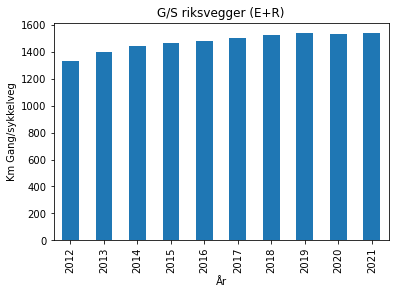

In [133]:
lengderdf['Riksveger (E+R)'].plot( kind='bar', ylabel='Km Gang/sykkelveg', title='G/S riksvegger (E+R)')

<AxesSubplot:title={'center':'G/S fylkesveger'}, xlabel='År', ylabel='Km Gang/sykkelveg'>

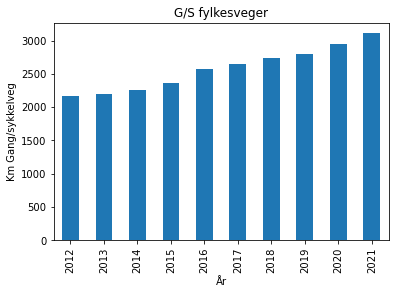

In [134]:
lengderdf['Fylkesveg'].plot( kind='bar', ylabel='Km Gang/sykkelveg', title='G/S fylkesveger')

<AxesSubplot:title={'center':'G/s alle kommunalveger (K+S)'}, xlabel='År', ylabel='Km Gang/sykkelveg'>

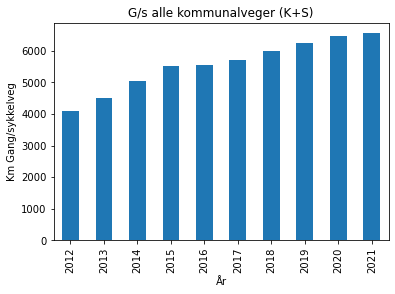

In [135]:
lengderdf['Alle kommunalveger (K+P)'] = lengderdf['Kommunal veg'] + lengderdf['Privat veg']
lengderdf['Alle kommunalveger (K+P)'].plot( kind='bar', ylabel='Km Gang/sykkelveg', title='G/s alle kommunalveger (K+S)')

<AxesSubplot:title={'center':'G/S vegkategori K'}, xlabel='År', ylabel='Km Gang/sykkelveg'>

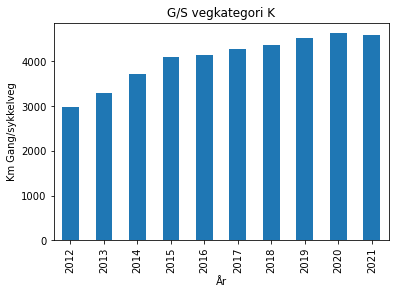

In [136]:
lengderdf['Kommunal veg'].plot( kind='bar', ylabel='Km Gang/sykkelveg', title='G/S vegkategori K')

In [143]:
nvdbgeotricks.skrivexcel( 'Lenger gang sykkelveg.xlsx', lengderdf)

skrev 1 faner til Lenger gang sykkelveg.xlsx 


In [145]:
lengderdf

,År,Europaveg,Fylkesveg,Kommunal veg,Privat veg,Riksveg,Riksveger (E+R),Alle kommunalveger (K+P)
År,,,,,,,,
2012,2012,700.996070,2162.200744,2979.827199,1122.438518,633.288068,1334.284138,4102.265717
2013,2013,740.671558,2196.167775,3290.522843,1207.889164,654.967081,1395.638639,4498.412007
2014,2014,776.187929,2259.136048,3709.472226,1346.322481,668.573280,1444.761209,5055.794707
2015,2015,787.345602,2367.055373,4098.773147,1431.112817,676.551202,1463.896804,5529.885964
2016,2016,813.701081,2572.342169,4141.414086,1398.327270,665.984080,1479.685161,5539.741356
2017,2017,821.588314,2647.420077,4273.762761,1438.919648,679.666230,1501.254544,5712.682409
2018,2018,851.670678,2740.784807,4366.729417,1624.089008,677.156091,1528.826769,5990.818425
2019,2019,855.001755,2799.435690,4526.018380,1728.361325,681.402590,1536.404345,6254.379705
2020,2020,854.813975,2947.932876,4631.690347,1848.511017,674.216435,1529.030410,6480.201364
